In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
<p style="20px">
In this notebook, we are going to explore inter-column relations and will ultimately create Features with the potential of influencing dropouts
<br>
Currently, the features that influence dropout rates even in the slightest are
<ul>
<li>daily_study_hours</li>
<li>admission_taken</li>
<li>peer_pressure_level</li>
<p>

In [74]:
jee = pd.read_csv("../Data/JEE_Dropout_After_Class_12.csv",delimiter=',')
jee

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


In [75]:
jee.isna().sum()

jee_main_score             0
jee_advanced_score         0
mock_test_score_avg        0
school_board               0
class_12_percent           0
attempt_count              0
coaching_institute      1209
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
dtype: int64

In [76]:
jee.describe()

,jee_main_score,jee_advanced_score,mock_test_score_avg,class_12_percent,attempt_count,daily_study_hours,dropout
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,71.961226,65.736404,68.110756,74.957400,1.504600,4.483860,0.207200
std,13.668497,15.909248,11.938849,9.885309,0.500029,1.984723,0.405341
min,26.620000,3.240000,27.490000,50.000000,1.000000,0.000000,0.000000
25%,62.790000,55.017500,60.070000,68.067500,1.000000,3.100000,0.000000
50%,72.190000,65.720000,68.120000,74.940000,2.000000,4.500000,0.000000
75%,81.322500,76.835000,76.110000,81.842500,2.000000,5.900000,0.000000
max,100.000000,100.000000,100.000000,100.000000,2.000000,10.000000,1.000000


In [77]:
lo = pd.concat([jee.head(), jee.tail()], axis=0)
lo

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0
4999,60.13,76.31,66.15,State,94.90,2,FIITJEE,2.1,Mid,12th,Urban,Low,Yes,No,0


In [78]:
x=jee.loc[jee["dropout"]==1]["dropout"].count()
y=jee.loc[jee["dropout"]==0]["dropout"].count()
print(f"Percentage of dropouts: {x/(x+y)*100:.2f}% and Percentage of non-dropouts: {y/(x+y)*100:.2f}%")

Percentage of dropouts: 20.72% and Percentage of non-dropouts: 79.28%


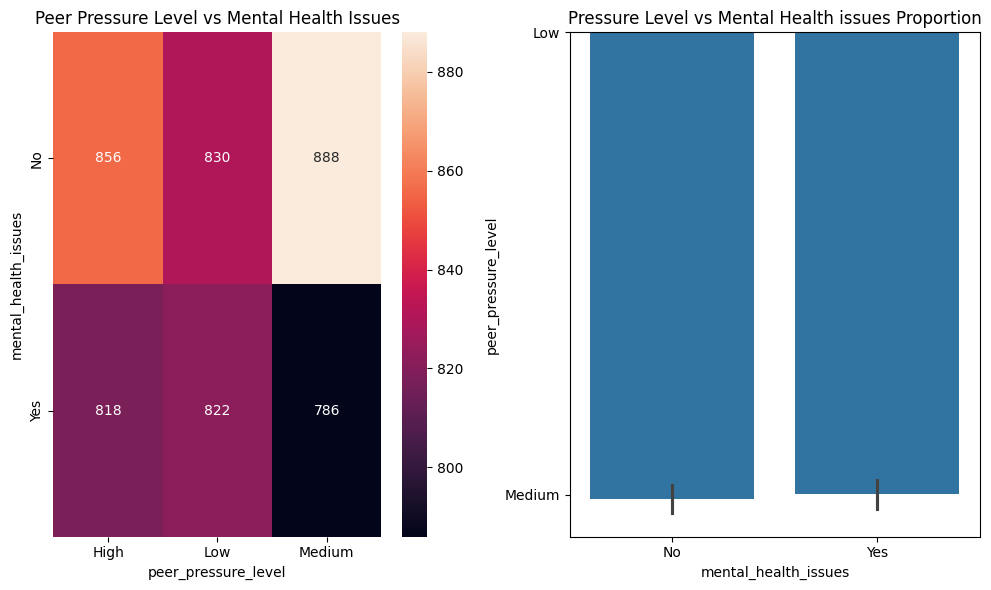

In [79]:
fig,axes= plt.subplots(1,2,figsize=(10,6))

sns.heatmap(pd.crosstab(jee["mental_health_issues"], jee["peer_pressure_level"]),annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Peer Pressure Level vs Mental Health Issues")

sns.barplot(x="mental_health_issues", y="peer_pressure_level", data=jee, ax=axes[1])
axes[1].set_title("Pressure Level vs Mental Health issues Proportion")
plt.tight_layout()
plt.show()

In [80]:
jee_fe = jee[["mental_health_issues", "peer_pressure_level","dropout"]].copy()
jee_fe

,mental_health_issues,peer_pressure_level,dropout
0,No,Low,1
1,Yes,Low,0
2,Yes,Medium,1
3,Yes,Medium,0
4,No,High,0
...,...,...,...
4995,Yes,High,0
4996,Yes,High,0
4997,Yes,Medium,0
4998,No,Low,0


In [81]:
jee_fe["mental_health_issues"] = jee_fe["mental_health_issues"].map({
  "Yes":1,
  "No":0
})

jee_fe["peer_pressure_level"] = jee_fe["peer_pressure_level"].map({
  "Low":0,
  "Medium":1,
  "High":2
})

jee_fe

,mental_health_issues,peer_pressure_level,dropout
0,0,0,1
1,1,0,0
2,1,1,1
3,1,1,0
4,0,2,0
...,...,...,...
4995,1,2,0
4996,1,2,0
4997,1,1,0
4998,0,0,0


In [82]:
jee_fe["peer_focused_mh"] = jee_fe["peer_pressure_level"] * 2 + jee_fe["mental_health_issues"]
jee_fe["mental_health_pp"] = jee_fe["mental_health_issues"] * 2 + jee_fe["peer_pressure_level"]
jee_fe["peer_focused_mh_weighted"] = jee_fe["peer_pressure_level"]* 5 + jee_fe["mental_health_issues"]*2
jee_fe

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted
0,0,0,1,0,0,0
1,1,0,0,1,2,2
2,1,1,1,3,3,7
3,1,1,0,3,3,7
4,0,2,0,4,2,10
...,...,...,...,...,...,...
4995,1,2,0,5,4,12
4996,1,2,0,5,4,12
4997,1,1,0,3,3,7
4998,0,0,0,0,0,0


In [83]:
jee_fe

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted
0,0,0,1,0,0,0
1,1,0,0,1,2,2
2,1,1,1,3,3,7
3,1,1,0,3,3,7
4,0,2,0,4,2,10
...,...,...,...,...,...,...
4995,1,2,0,5,4,12
4996,1,2,0,5,4,12
4997,1,1,0,3,3,7
4998,0,0,0,0,0,0


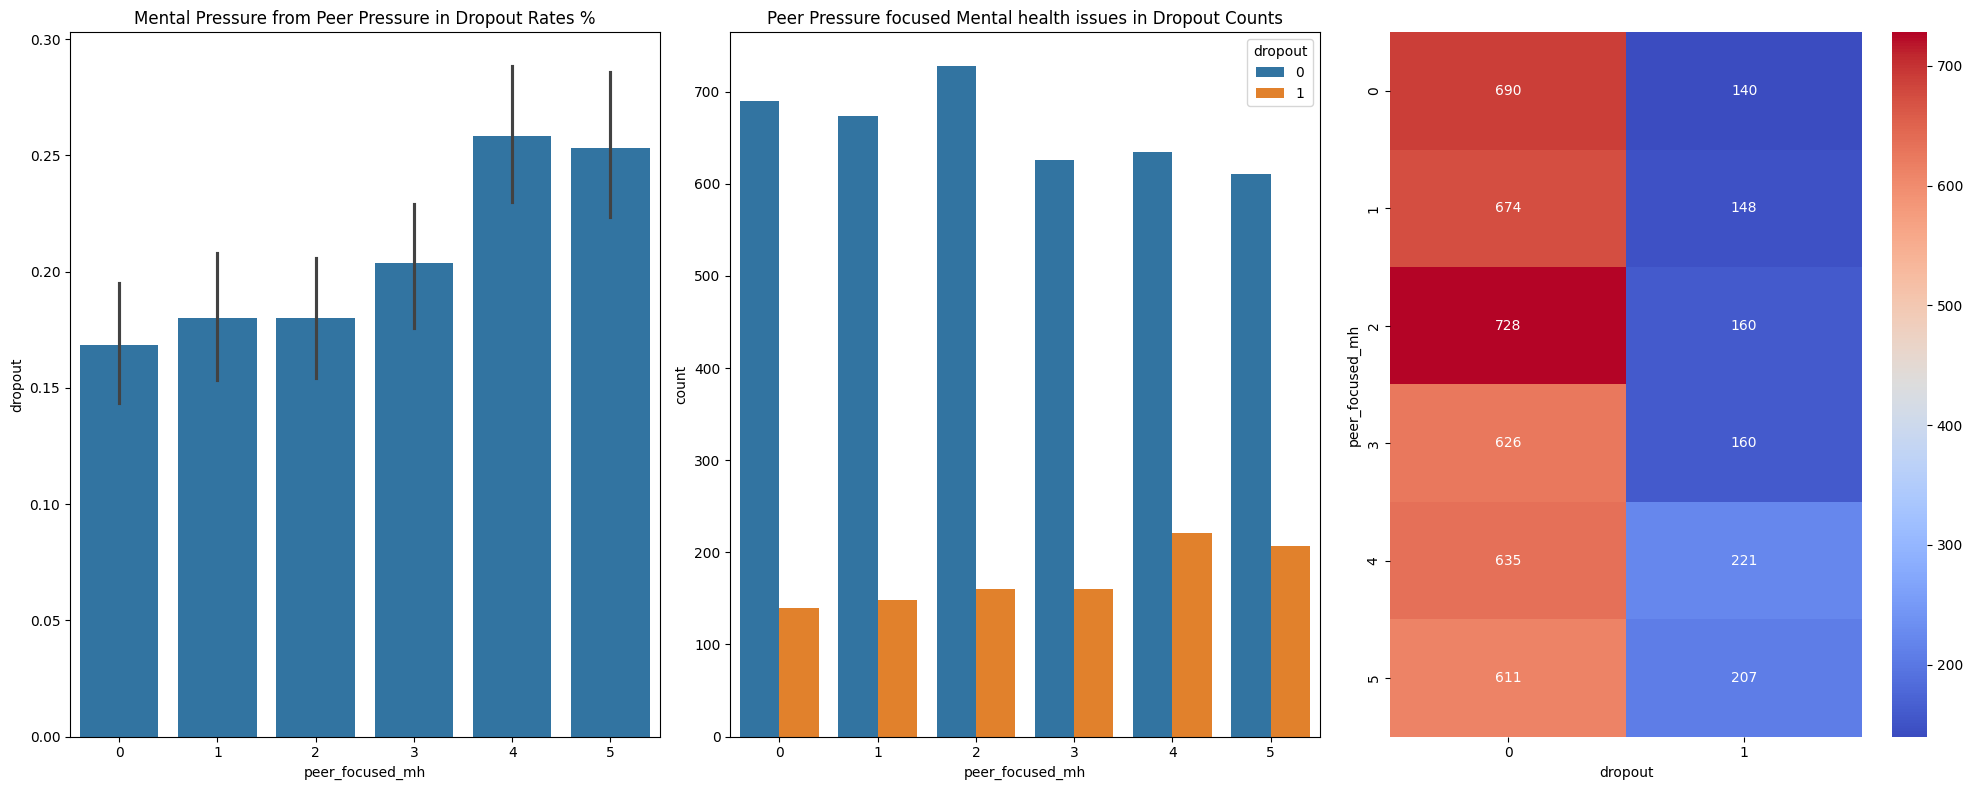

In [84]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x="peer_focused_mh", y="dropout", data=jee_fe, ax=axes[0])
axes[0].set_title("Mental Pressure from Peer Pressure in Dropout Rates %")
sns.countplot(x="peer_focused_mh", hue="dropout", data=jee_fe, ax=axes[1])
axes[1].set_title("Peer Pressure focused Mental health issues in Dropout Counts")
sns.heatmap(pd.crosstab(jee_fe["peer_focused_mh"],jee_fe["dropout"]),annot=True, fmt='d',cmap='coolwarm', ax=axes[2])
plt.tight_layout()
plt.show()

In [85]:
jee_fe[jee_fe["peer_focused_mh"].isin([4,5])][["mental_health_issues","peer_pressure_level","peer_focused_mh"]].sample(4)

,mental_health_issues,peer_pressure_level,peer_focused_mh
4233,1,2,5
1567,1,2,5
4382,1,2,5
1581,0,2,4


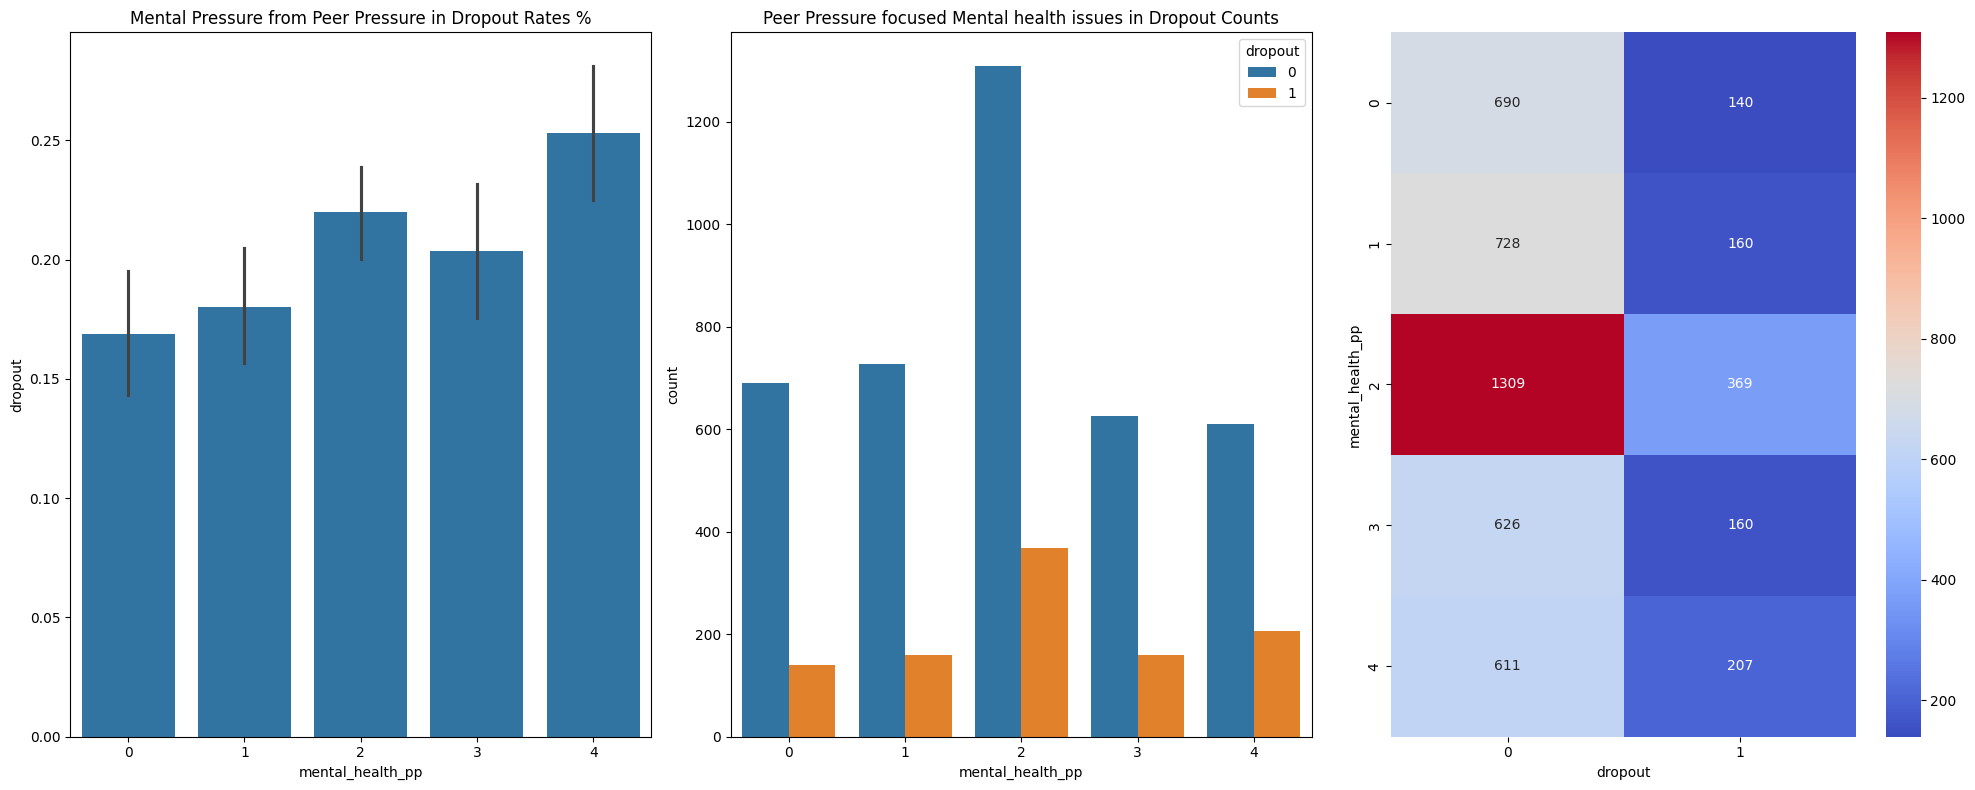

In [86]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x="mental_health_pp", y="dropout", data=jee_fe, ax=axes[0])
axes[0].set_title("Mental Pressure from Peer Pressure in Dropout Rates %")
sns.countplot(x="mental_health_pp", hue="dropout", data=jee_fe, ax=axes[1])
axes[1].set_title("Peer Pressure focused Mental health issues in Dropout Counts")
sns.heatmap(pd.crosstab(jee_fe["mental_health_pp"], jee_fe["dropout"]), annot=True, fmt='d',cmap='coolwarm', ax=axes[2])
plt.tight_layout()
plt.show()

In [87]:
jee_fe[jee_fe["mental_health_pp"].isin([4])][["mental_health_issues","peer_pressure_level","mental_health_pp"]].sample(4)

,mental_health_issues,peer_pressure_level,mental_health_pp
3470,1,2,4
306,1,2,4
189,1,2,4
2349,1,2,4


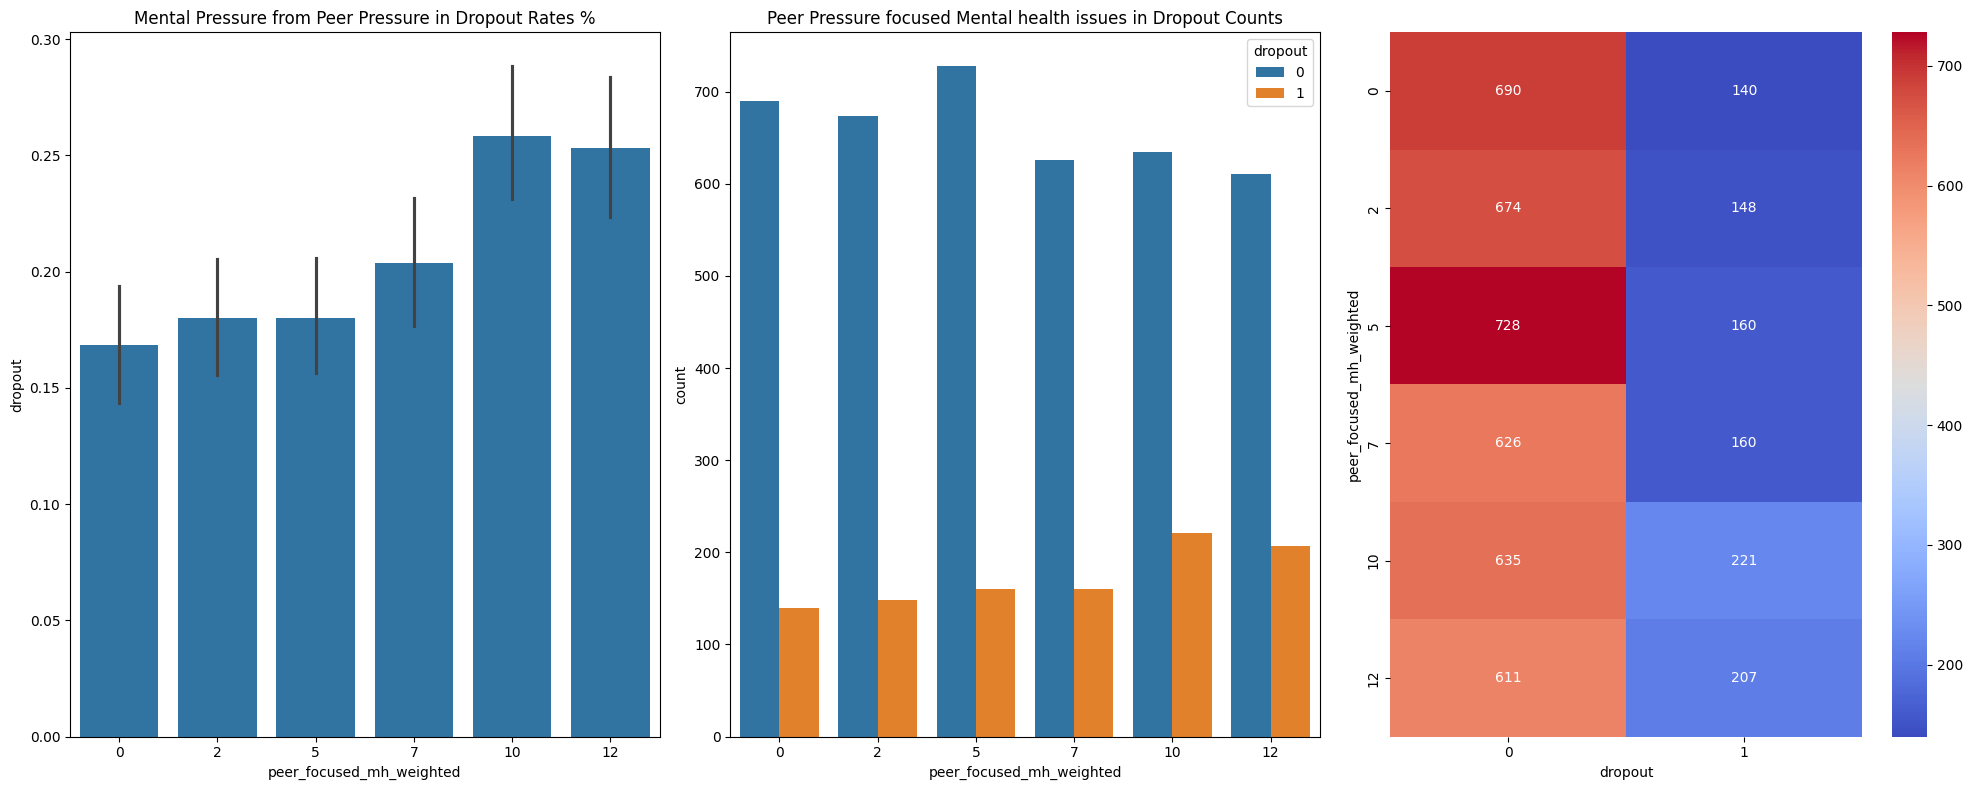

In [88]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x="peer_focused_mh_weighted", y="dropout", data=jee_fe, ax=axes[0])
axes[0].set_title("Mental Pressure from Peer Pressure in Dropout Rates %")
sns.countplot(x="peer_focused_mh_weighted", hue="dropout", data=jee_fe, ax=axes[1])
axes[1].set_title("Peer Pressure focused Mental health issues in Dropout Counts")
sns.heatmap(pd.crosstab(jee_fe["peer_focused_mh_weighted"], jee_fe["dropout"]), annot=True, fmt='d',cmap='coolwarm', ax=axes[2])
plt.tight_layout()
plt.show()

<p style="font-size: 20px">
As we can see, we can see a proper trend in <b>peer_focused_mh</b> with <b>mental_health_pp</b> can be counted as a secondary feature for consideration.<br>
Also since <b>peer_focused_mh_weighted</b> has the same trend as <b>peer_focused_mh</b>, it is logical to not include it into the original dataframe.
</p>

## Mock Test and Real test Gap
<p style="font-size:20px">
Since it is not explicitly mentioned that the mock_test_score_avg is for Mains or Advanced, I am going to do a correlation between the three.
</p>

In [89]:
jee[["jee_main_score","jee_advanced_score","mock_test_score_avg"]].corr()

,jee_main_score,jee_advanced_score,mock_test_score_avg
jee_main_score,1.000000,0.000206,-0.003406
jee_advanced_score,0.000206,1.000000,-0.005665
mock_test_score_avg,-0.003406,-0.005665,1.000000


<p style="font-size: 18px">
It seems that neither are correlated with mock_test_score_avg
</p>

## Mock_Main_Gap
<p style="font-size: 20px">
Eitherways, a new column named <b>"Mock_Main_Gap"</b> will be created to see if more gaps between <b>jee_main_score</b> and <b>mock_test_avg</b> correlates with increased <b>mental_health_issues</b> or <b>peer_pressure_level</b> or <b>BOTH</b>
</p>

In [90]:
jee_fe["mock_main_gap"] = jee["jee_main_score"] - jee["mock_test_score_avg"]
jee_fe.head()

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted,mock_main_gap
0,0,0,1,0,0,0,19.09
1,1,0,0,1,2,2,5.73
2,1,1,1,3,3,7,20.24
3,1,1,0,3,3,7,23.99
4,0,2,0,4,2,10,-13.65


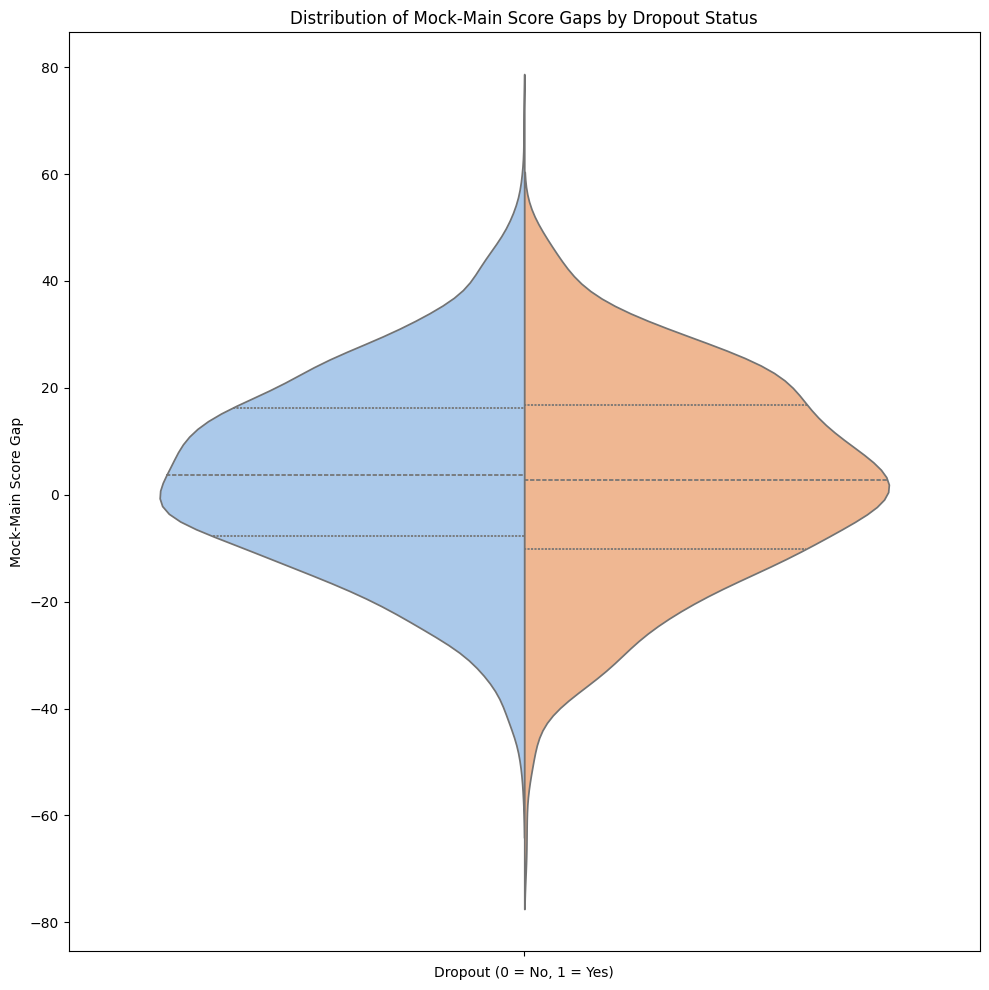

In [91]:
plt.figure(figsize=(10, 10))
sns.violinplot(hue="dropout", y="mock_main_gap", split=True, data=jee_fe, inner="quartile", palette="pastel",legend=False)

plt.title("Distribution of Mock-Main Score Gaps by Dropout Status")
plt.xlabel("Dropout (0 = No, 1 = Yes)")
plt.ylabel("Mock-Main Score Gap")
plt.tight_layout()
plt.show()

<p style="font-size: 20px">
We find that higher the negative difference in <b>jee_main_score</b> and <b>mock_test_score_avg</b>, the student has a higher chance of dropping out.<br>
<b>This can indicate GUESSWORK and/or ACADEMIC PRESSURE</b>
</p>

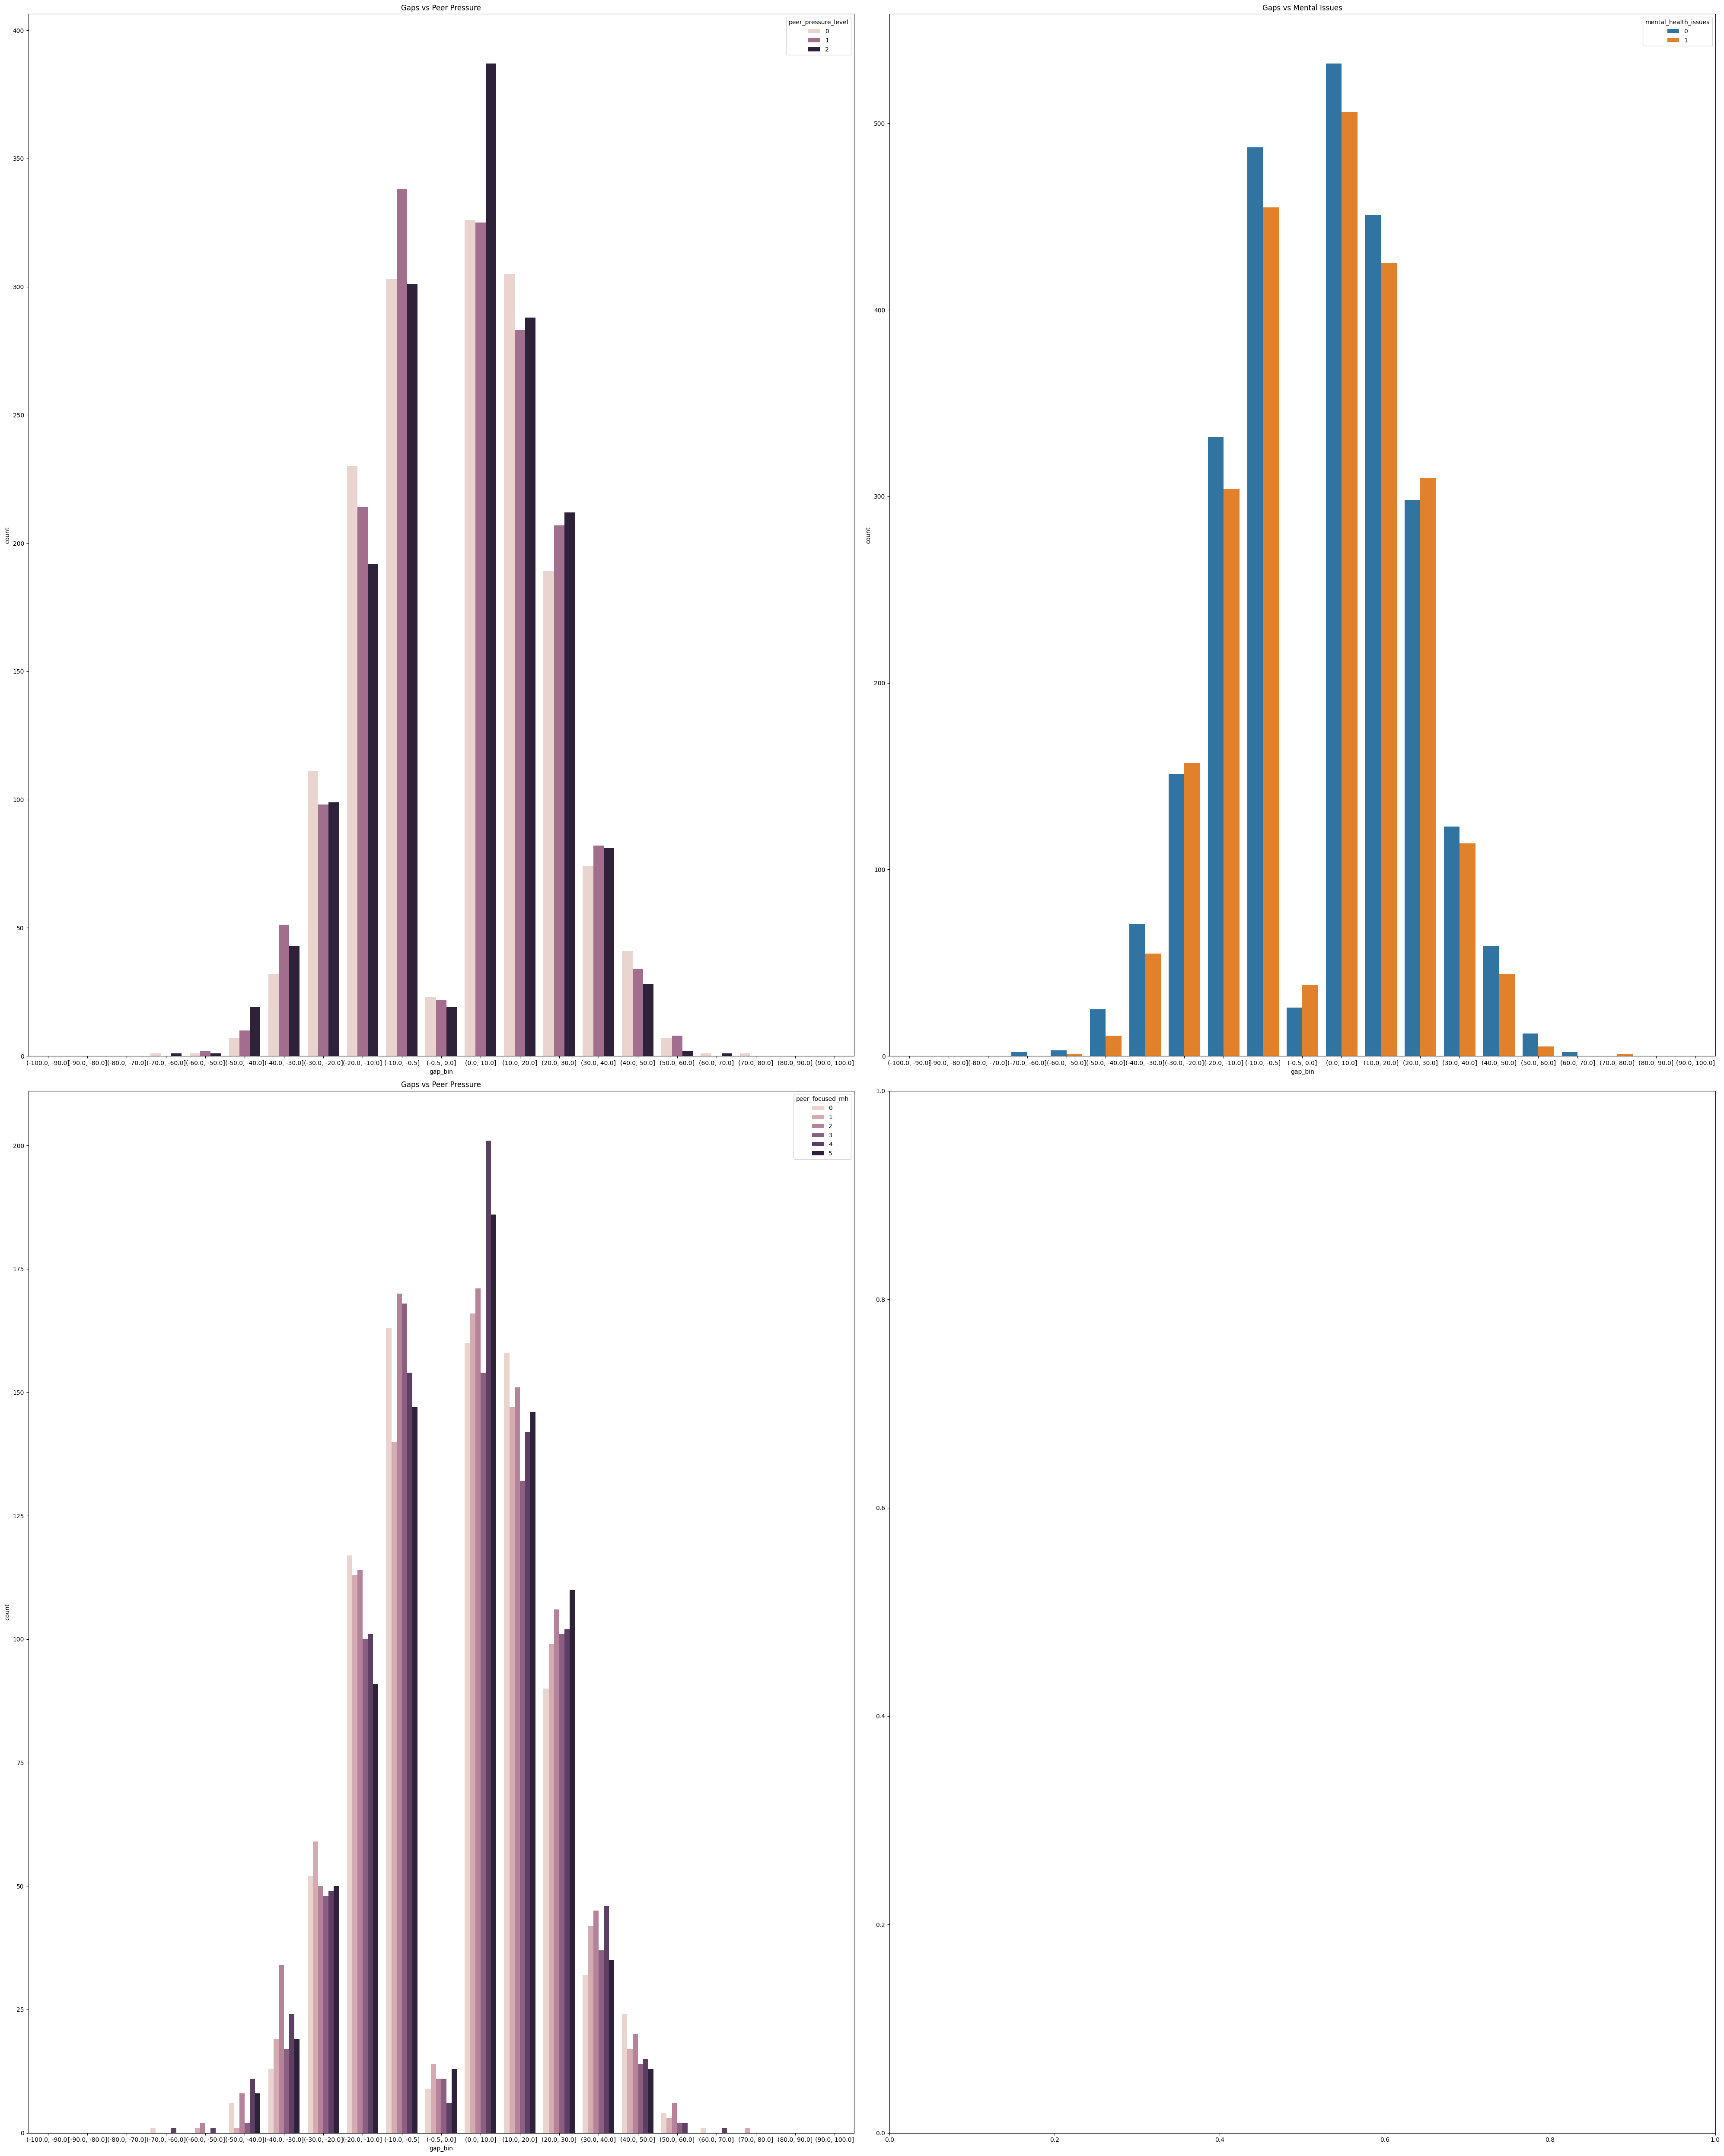

In [92]:
fig, axes = plt.subplots(2,2, figsize=(40,50))
bins = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, -0.5, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
jee_fe["gap_bin"] = pd.cut(jee_fe["mock_main_gap"], bins=bins)
sns.countplot(x="gap_bin", hue="peer_pressure_level",data=jee_fe, ax=axes[0,0])
axes[0,0].set_title("Gaps vs Peer Pressure")
sns.countplot(x="gap_bin", hue="mental_health_issues", data=jee_fe, ax=axes[0,1])
axes[0,1].set_title("Gaps vs Mental Issues")
sns.countplot(x="gap_bin", hue="peer_focused_mh",data=jee_fe, ax=axes[1,0])
axes[1,0].set_title("Gaps vs Peer Pressure")


plt.tight_layout()
plt.show()

C:\Users\chrch\AppData\Local\Temp\ipykernel_30792\715367622.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = jee_fe.groupby(


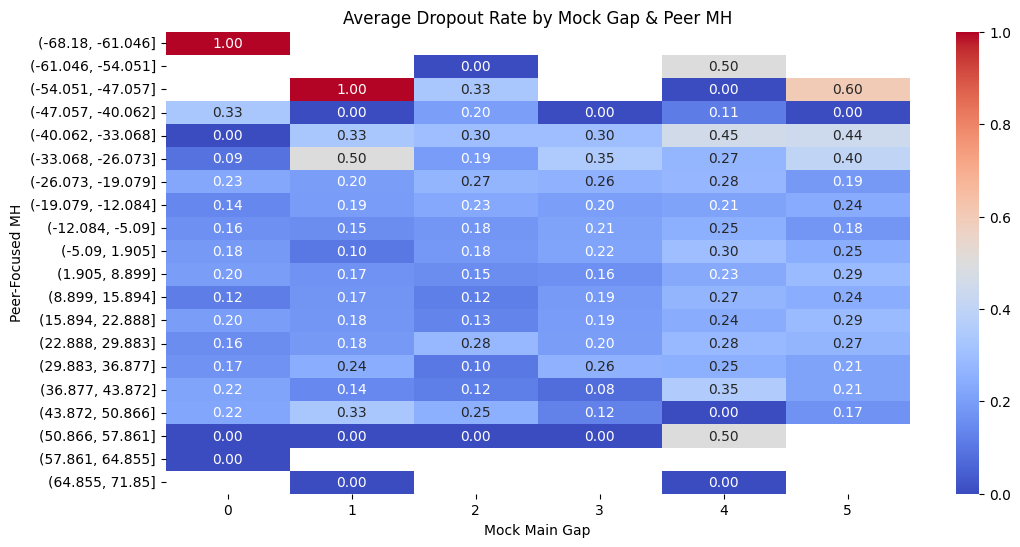

In [93]:
heatmap_data = jee_fe.groupby(
    [pd.cut(jee_fe['mock_main_gap'], bins=20), 'peer_focused_mh']
)['dropout'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Average Dropout Rate by Mock Gap & Peer MH")
plt.xlabel("Mock Main Gap")
plt.ylabel("Peer-Focused MH")
plt.show()

In [94]:
import scipy.stats as stats
def cramers_v(confusion_matrix):
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2=chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

target = 'dropout'
for col in jee_fe.columns:
  if col == target:
    continue
  try:
    contingency = pd.crosstab(jee_fe[col],jee_fe[target])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    cramer_v = cramers_v(contingency)
    print(f"\n Feature: {col}")
    print(f"Chi square p-value: {p}")
    
    if p < 0.05:
      print(f"Statistically significant relationship")
      print(f"Cramer's V: {cramer_v}")
    else:
      print(f"No Significant relationship")
  except Exception as e:
    print(f"Skipping {col} due to error: {e}")



 Feature: mental_health_issues
Chi square p-value: 0.4087327606376472
No Significant relationship

 Feature: peer_pressure_level
Chi square p-value: 7.445029907800258e-09
Statistically significant relationship
Cramer's V: 0.08418803628847978

 Feature: peer_focused_mh
Chi square p-value: 2.153384149834242e-07
Statistically significant relationship
Cramer's V: 0.0827248626710178

 Feature: mental_health_pp
Chi square p-value: 9.477622345963638e-05
Statistically significant relationship
Cramer's V: 0.06266143547178396

 Feature: peer_focused_mh_weighted
Chi square p-value: 2.153384149834242e-07
Statistically significant relationship
Cramer's V: 0.0827248626710178

 Feature: mock_main_gap
Chi square p-value: 0.6094778333673887
No Significant relationship

 Feature: gap_bin
Chi square p-value: 0.0026047540666996293
Statistically significant relationship
Cramer's V: 0.06296848869659148


In [95]:
jee_fe

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted,mock_main_gap,gap_bin
0,0,0,1,0,0,0,19.09,"(10.0, 20.0]"
1,1,0,0,1,2,2,5.73,"(0.0, 10.0]"
2,1,1,1,3,3,7,20.24,"(20.0, 30.0]"
3,1,1,0,3,3,7,23.99,"(20.0, 30.0]"
4,0,2,0,4,2,10,-13.65,"(-20.0, -10.0]"
...,...,...,...,...,...,...,...,...
4995,1,2,0,5,4,12,14.23,"(10.0, 20.0]"
4996,1,2,0,5,4,12,-0.89,"(-10.0, -0.5]"
4997,1,1,0,3,3,7,16.25,"(10.0, 20.0]"
4998,0,0,0,0,0,0,25.92,"(20.0, 30.0]"


In [96]:
jee.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


In [101]:

jee_t = jee_fe.copy()
jee_t["family_income"] = jee["family_income"]
jee_t["family_income"] = jee_t["family_income"].map({
  "Low":0,
  "Mid":1,
  "High":2
})

In [102]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

jee_t["daily_study_hours"] = jee["daily_study_hours"]
features = ["mock_main_gap","peer_focused_mh","daily_study_hours","family_income"]
target = "dropout"

X= jee_t[features]
Y= jee_t[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       804
           1       0.61      0.58      0.59       196

    accuracy                           0.84      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.84      0.84      0.84      1000



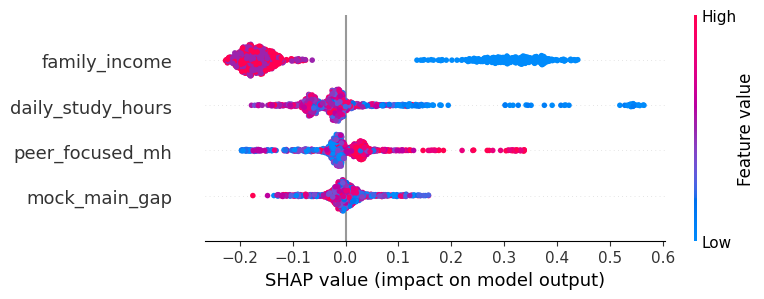

In [103]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # shape: (2, 1000, 2)

# If shap_values is a list (old format)
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # class=1 → dropout
else:
    shap.summary_plot(shap_values[..., 1], X_test)  # class=1 last axis

In [ ]:
import sys
import seaborn 
print(sys.executable)

c:\Users\chrch\AppData\Local\Programs\Python\Python311\python.exe


# In short,
<p style="font-size: 20px">
These are the columns that will be added to the featured-engineered dataframe:
<ul>
<li>peer_focused_mh</li>
<li>mental_health_pp</li>
</p>